In [50]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [22]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [63]:
df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67325 entries, 0 to 67324
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        67325 non-null  object 
 1   Customer_ID               67325 non-null  object 
 2   Month                     67325 non-null  object 
 3   Name                      60631 non-null  object 
 4   Age                       67325 non-null  object 
 5   SSN                       67325 non-null  object 
 6   Occupation                67325 non-null  object 
 7   Annual_Income             67325 non-null  object 
 8   Monthly_Inhand_Salary     57257 non-null  float64
 9   Num_Bank_Accounts         67325 non-null  int64  
 10  Num_Credit_Card           67325 non-null  int64  
 11  Interest_Rate             67325 non-null  int64  
 12  Num_of_Loan               67325 non-null  object 
 13  Type_of_Loan              59760 non-null  object 
 14  Delay_

In [25]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,57257.000000,67325.000000,67325.000000,67325.000000,67325.000000,66049.000000,67325.000000,67324.000000
mean,4187.857736,17.072321,22.886996,71.048392,21.075797,27.367712,32.305119,1406.367183
std,3182.578496,117.656679,130.923808,460.106479,14.818090,189.892901,5.112609,8342.612265
min,319.556250,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1626.761667,3.000000,4.000000,8.000000,10.000000,3.000000,28.074447,30.882707
50%,3077.808333,6.000000,6.000000,13.000000,18.000000,6.000000,32.351214,69.412940
75%,5940.317500,7.000000,7.000000,20.000000,28.000000,9.000000,36.509266,162.127336
max,15204.633333,1798.000000,1499.000000,5788.000000,67.000000,2597.000000,50.000000,82256.000000


In [26]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,6694
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,10068
Num_Bank_Accounts,0


In [27]:
df.dropna(inplace=True)

In [28]:
df.nunique()

,0
ID,35868
Customer_ID,7469
Month,8
Name,6529
Age,760
SSN,7465
Occupation,16
Annual_Income,9938
Monthly_Inhand_Salary,7839
Num_Bank_Accounts,389


Target Distribution

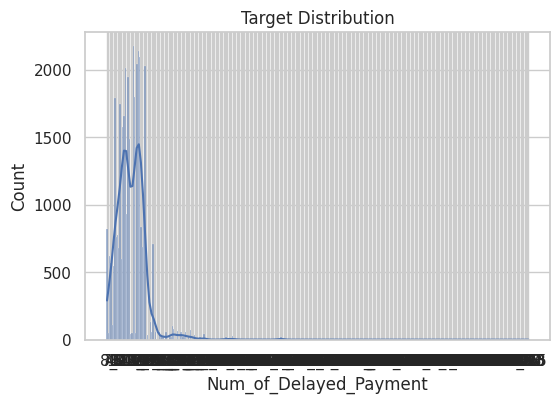

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(df["Num_of_Delayed_Payment"], kde=True)
plt.title("Target Distribution")
plt.show()

In [30]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [31]:
df.head(), df.columns.tolist()

(        ID Customer_ID     Month             Name  Age          SSN  \
 0   0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265   
 6   0x1608   CUS_0xd40      July    Aaron Maashoh   23  821-00-0265   
 8   0x160e  CUS_0x21b1   January  Rick Rothackerj  28_  004-07-5839   
 9   0x160f  CUS_0x21b1  February  Rick Rothackerj   28  004-07-5839   
 10  0x1610  CUS_0x21b1     March  Rick Rothackerj   28  004-07-5839   
 
    Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
 0   Scientist      19114.12            1824.843333                  3   
 6   Scientist      19114.12            1824.843333                  3   
 8     _______      34847.84            3037.986667                  2   
 9     Teacher      34847.84            3037.986667                  2   
 10    Teacher     34847.84_            3037.986667                  2   
 
     Num_Credit_Card  Interest_Rate Num_of_Loan  \
 0                 4              3           4   
 6                

Correlations

<Axes: >

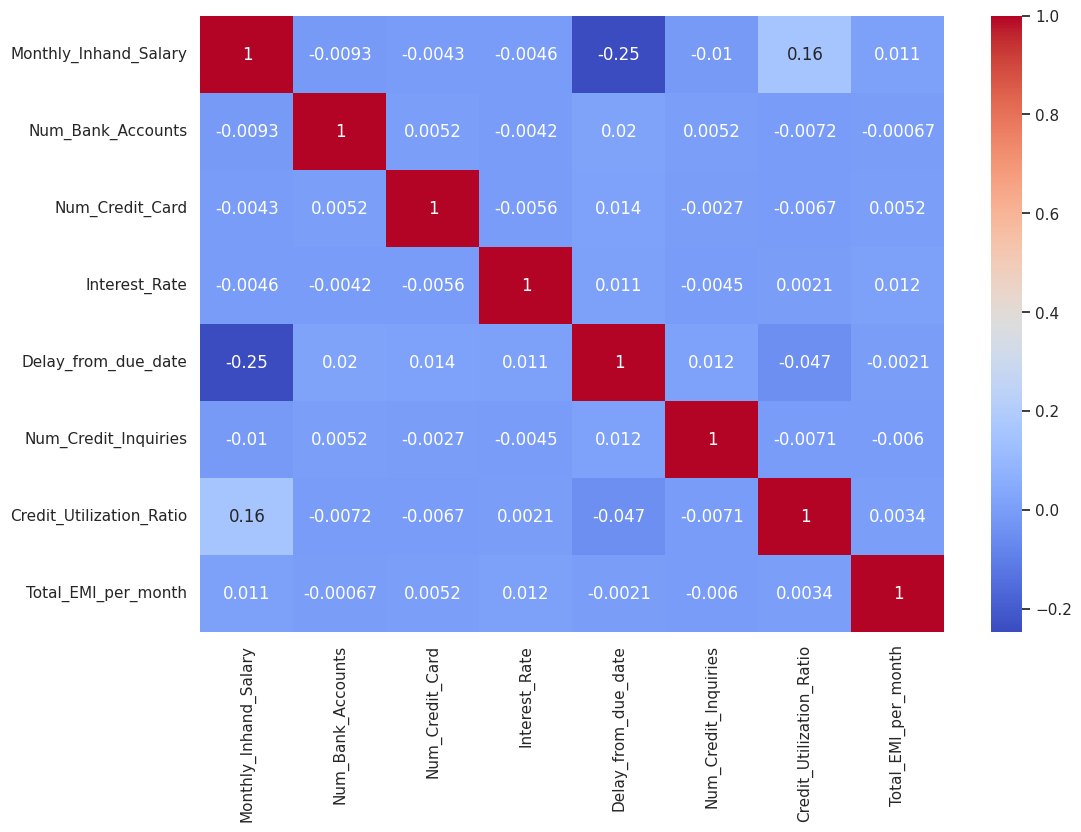

In [32]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Preprocessing**

In [33]:
print(df.columns.tolist())

['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [34]:
df.fillna(df.mean(numeric_only=True), inplace=True)

Label Encoding for 'Payment_Behaviour'

In [35]:
df['Payment_Behaviour'] = LabelEncoder().fit_transform(df['Payment_Behaviour'])
df = pd.get_dummies(df, columns=['Payment_Behaviour'])


In [36]:
numeric_cols = ['Age', 'Annual_Income', 'Outstanding_Debt']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True), errors='coerce')



delete rows with missing target values

In [37]:
df = df.dropna(subset=['Num_of_Delayed_Payment'])

# Define features and binary targe


Convert 'Num_of_Delayed_Payment' to numeric, handling errors


In [41]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df = df.dropna(subset=['Num_of_Delayed_Payment'])


In [42]:
X = df.drop(columns=['Num_of_Delayed_Payment'])
y = (df['Num_of_Delayed_Payment'] > 3).astype(int)


Train-test split


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Exploratory Data Analysis(EDA

Target distribution

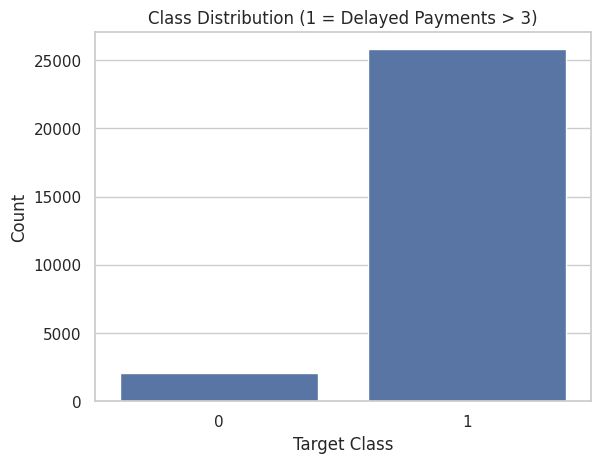

In [59]:
sns.countplot(x=y_train)
plt.title("Class Distribution (1 = Delayed Payments > 3)")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()


Distribution of Numeric Features

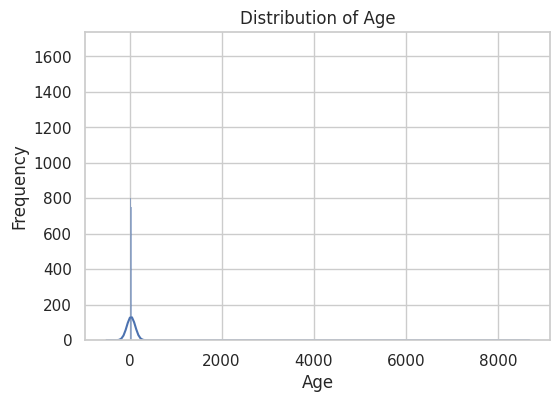

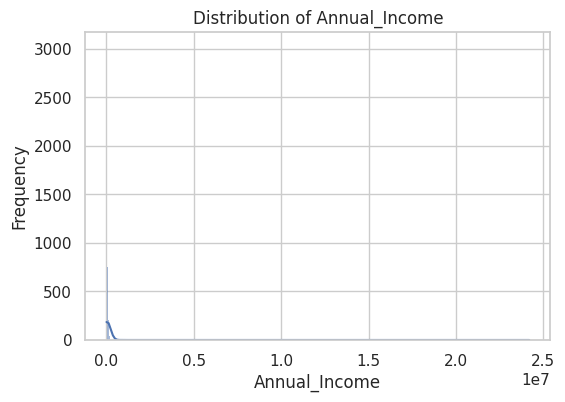

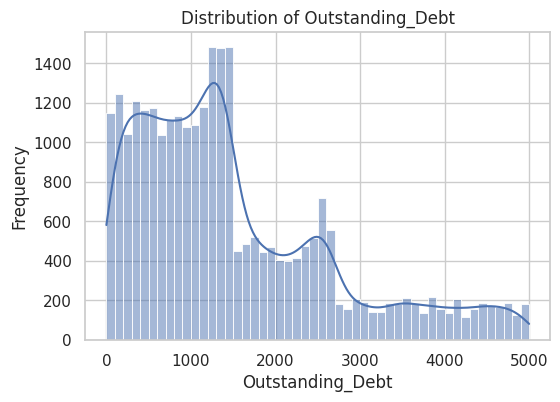

In [60]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Correlation Heatmap


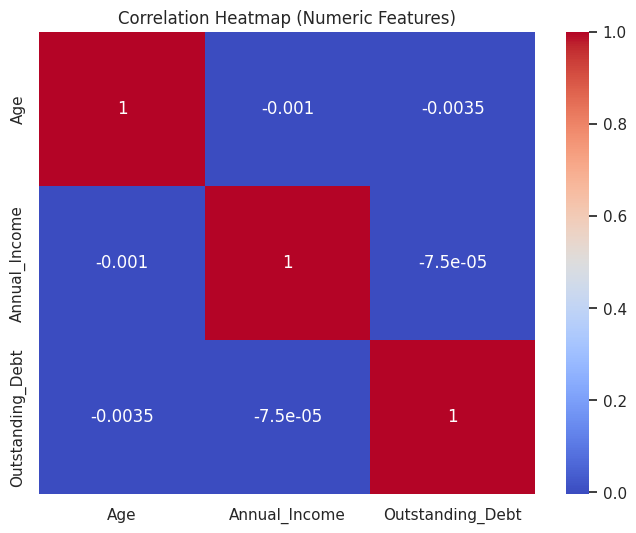

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(X_train[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

Boxplots by Target Class (this is to explore relationship with risk)



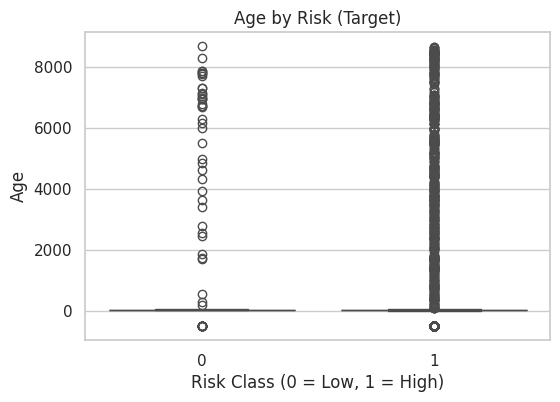

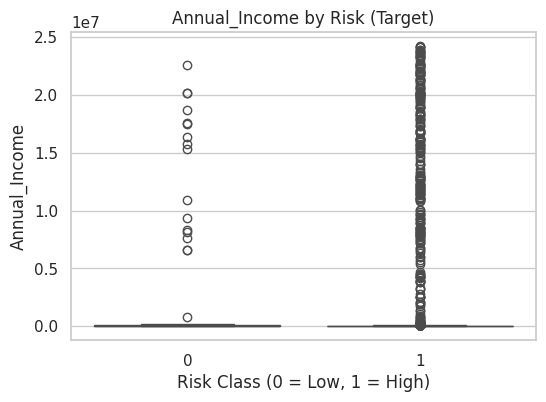

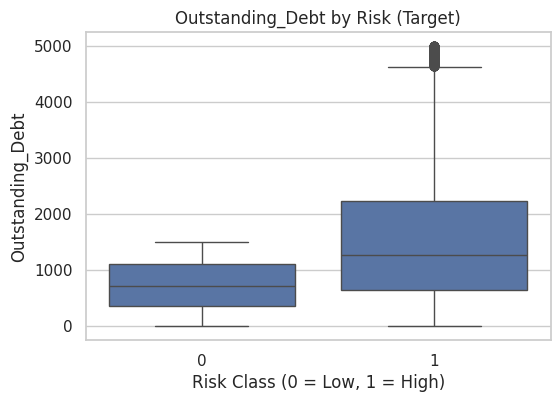

In [61]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y_train, y=X_train[col])
    plt.title(f"{col} by Risk (Target)")
    plt.xlabel("Risk Class (0 = Low, 1 = High)")
    plt.ylabel(col)
    plt.show()


#Feature Engineering & Fuzzy AHP



Fuzzy AHP weights

In [47]:
fuzzy_weights = {
    'Age': 0.1,
    'Annual_Income': 0.3,
    'Outstanding_Debt': 0.6
}

In [48]:
# FOR weights TO CHHOSE FEATURE
X_train_weighted = X_train[numeric_cols] * pd.Series(fuzzy_weights)
X_test_weighted = X_test[numeric_cols] * pd.Series(fuzzy_weights)

In [49]:
# ADDING ENGINEERED features
X_train_weighted['Debt_to_Income'] = X_train['Outstanding_Debt'] / (X_train['Annual_Income'] + 1e-6)
X_test_weighted['Debt_to_Income'] = X_test['Outstanding_Debt'] / (X_test['Annual_Income'] + 1e-6)


 #Model Building (random forest )




In [51]:
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_weighted, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# elPredict
y_pred = rf_model.predict(X_test_weighted)

# Evaluation

In [57]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       551
           1       0.99      0.99      0.99      6413

    accuracy                           0.98      6964
   macro avg       0.93      0.91      0.92      6964
weighted avg       0.98      0.98      0.98      6964



Feature Importance Visualization

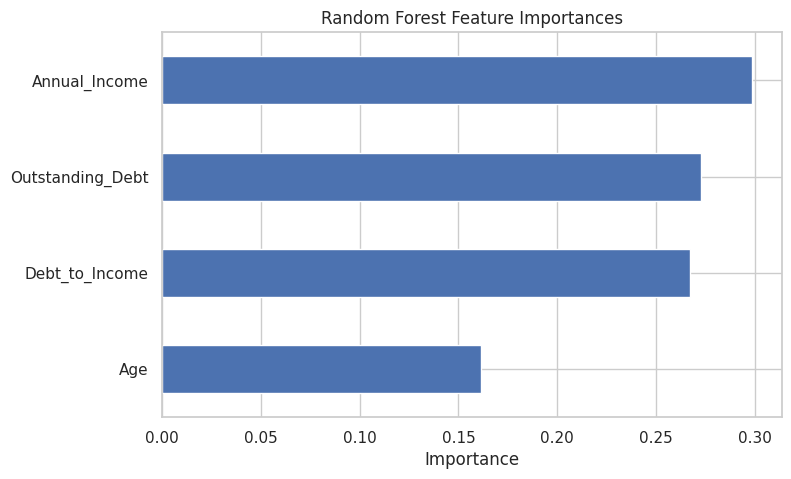

In [58]:
# Visualize feature importances
importances = pd.Series(rf_model.feature_importances_, index=X_train_weighted.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 5), title="Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()


Handling Class Imbalance
# SMOTE-NC


In [62]:
from imblearn.over_sampling import SMOTENC
smote = SMOTENC(categorical_features=[gender_col_index], random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

NameError: name 'gender_col_index' is not defined

#referance
my paper:https://www.mdpi.com/2227-9091/9/3/50